# Zero-Shot Image Classification with CLIP

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/autogluon/autogluon/blob/stable/docs/tutorials/multimodal/image_prediction/clip_zeroshot.ipynb)
[![Open In SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/autogluon/autogluon/blob/stable/docs/tutorials/multimodal/image_prediction/clip_zeroshot.ipynb)




When you want to classify an image to different classes, it is standard to train an image classifier based on the class names. However, it is tedious to collect training data. And if the collected data is too few or too imbalanced, you may not get a decent image classifier. So you wonder, is there a strong enough model that can handle this situaton without the training efforts?

Actually there is! OpenAI has introduced a model named [CLIP](https://openai.com/blog/clip/), which can be applied to any visual classification benchmark by simply providing the names of the visual categories to be recognized. And its accuracy is high, e.g., CLIP can achieve 76.2% top-1 accuracy on ImageNet without using any of the 1.28M training samples. This performance matches with original supervised ResNet50 on ImageNet, quite promising for a classification task with 1000 classes!

So in this tutorial, let's dive deep into CLIP. We will show you how to use CLIP model to do zero-shot image classification in AutoGluon.

## Simple Demo

Here we provide a simple demo to classify what dog breed is in the picture below.

In [1]:
!pip install autogluon.multimodal


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime

In [4]:
!pip install --upgrade nltk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 9.9 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-multimodal 1.1.1 requires torch<2.4,>=2.2, but you have torch 2.4.1 which is incompatible.
autogluon-multimodal 1.1.1 requires torchvision<0.19.0,>=0.16.0, but you have torchvision 0.19.1 which is incompatible.


In [1]:
!pip uninstall torchvision -y
!pip install torchvision

Found existing installation: torchvision 0.18.1
Uninstalling torchvision-0.18.1:
  Successfully uninstalled torchvision-0.18.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.1/797.1 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 MB 6.0 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 2.3.1
    Uninstalling triton-2.3.1:
      Successfully uninstalled triton-2.3.1
  Attempting uninstall: nvidia-cudnn-cu12
    Found existing installation: nvidia-cudnn-cu12 8.9.2.26
    Uninstalling nvidia-cudnn-cu12-8.9.2.26:
      Successfully uninstalled nvidia-cudnn-cu12-8.9.2.26
  Attempting uninstall: torch
    Found existing installation: torch 2.3.1
    Uninstalling torch-2.3.1:
      Successfully uninstalled torch-2.3.1
ERROR: pip's dependency resolver does not currently

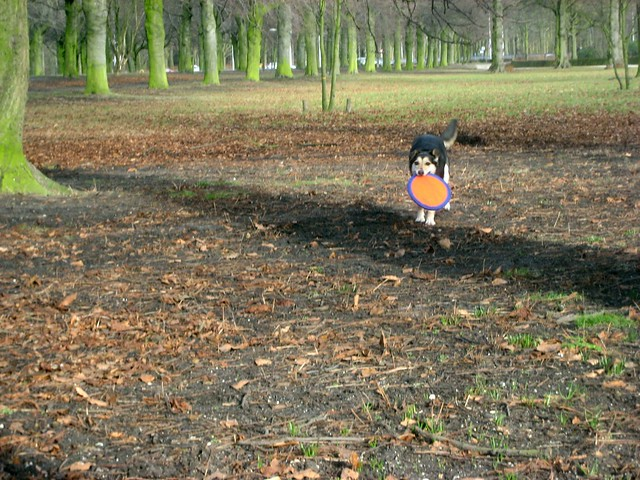

In [1]:
from autogluon.multimodal.utils import download  # Correct import for download utility
from PIL import Image as PILImage
from IPython.display import display

# URL of the image
url = "https://farm4.staticflickr.com/3445/3262471985_ed886bf61a_z.jpg"

# Download the image
dog_image = download(url)

# Open and display the image
pil_img = PILImage.open(dog_image)
display(pil_img)


Normally to solve this task, you need to collect some training data (e.g., [the Stanford Dogs dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/)) and train a dog breed classifier. But with CLIP, all you need to do is provide some potential visual categories. CLIP will handle the rest for you.

In [2]:
from autogluon.multimodal import MultiModalPredictor

predictor = MultiModalPredictor(problem_type="zero_shot_image_classification")
prob = predictor.predict_proba({"image": [dog_image]}, {"text": ['This is a Husky', 'This is a Golden Retriever', 'This is a German Sheperd', 'This is a Samoyed.']})
print("Label probs:", prob)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.76k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/844 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Label probs: [[5.6854284e-01 3.4538316e-04 4.1536975e-01 1.5742062e-02]]


Clearly, according to the probabilities, we know there is a Husky in the photo (which I think is correct)!

Let's try a harder example. Below is a photo of two Segways. This object class is not common in most existing vision datasets.

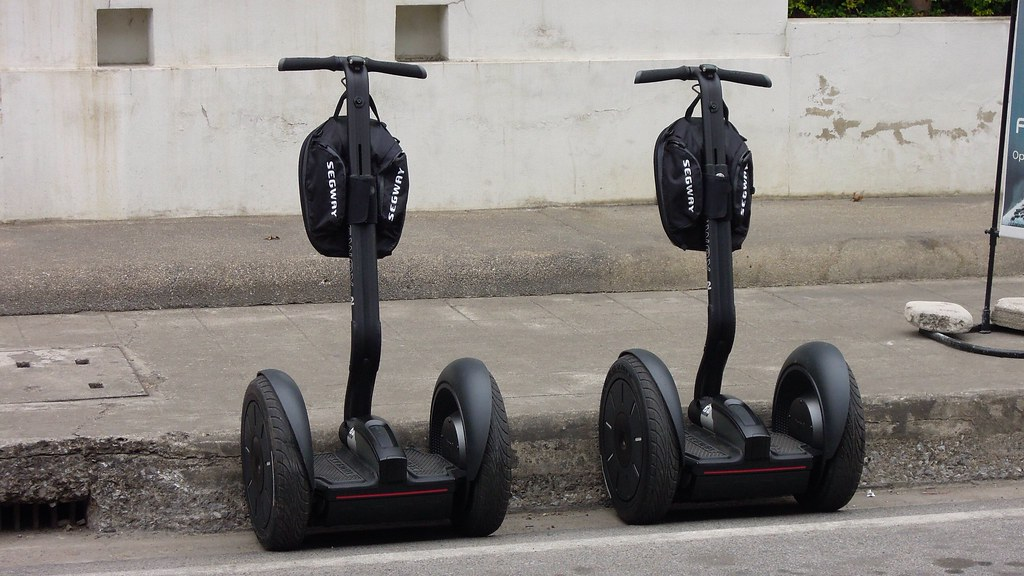

In [8]:
from PIL import Image as PILImage

url = "https://live.staticflickr.com/7236/7114602897_9cf00b2820_b.jpg"
segway_image = download(url)

# Open the image using PIL's open method
pil_img = PILImage.open(segway_image)

# Display the image
display(pil_img)

Given several text queries, CLIP can still predict the segway class correctly with high confidence.

In [9]:
prob = predictor.predict_proba({"image": [segway_image]}, {"text": ['segway', 'bicycle', 'wheel', 'car']})
print("Label probs:", prob)

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Label probs: [[9.9997187e-01 5.7654920e-06 2.0174022e-05 2.2770853e-06]]


This is amazing, right? Now a bit knowledge on why and how CLIP works. CLIP is called Contrastive Language-Image Pre-training. It is trained on a massive number of data (400M image-text pairs). By using a simple loss objective, CLIP tries to predict which out of a set of randomly sampled text is actually paired with an given image in the training dataset. As a result, CLIP models can then be applied to nearly arbitrary visual classification tasks just like the examples we have shown above.

## More about CLIP

CLIP is powerful, and it was designed to mitigate a number of major problems in the standard deep learning approach to computer vision, such as costly datasets, closed set prediction and poor generalization performance. CLIP is a good solution to many problems, however, it is not the ultimate solution. CLIP has its own limitations. For example, CLIP is vulnerable to typographic attacks, i.e., if you add some text to an image, CLIP's predictions will be easily affected by the text. Let's see one example from OpenAI's blog post on [multimodal neurons](https://openai.com/blog/multimodal-neurons/).

Suppose we have a photo of a Granny Smith apple,

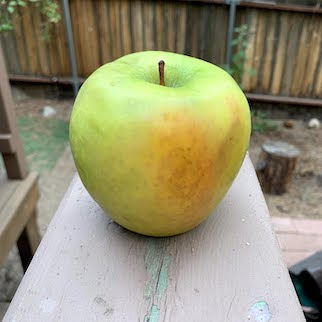

In [19]:
# URL of the image
url = "https://cdn.openai.com/multimodal-neurons/assets/apple/apple-blank.jpg"

# Download the image
apple_image = download(url)

# Open and display the image
pil_img = PILImage.open(apple_image)
display(pil_img)


We then try to classify this image to several classes, such as Granny Smith, iPod, library, pizza, toaster and dough.

In [20]:
prob = predictor.predict_proba({"image": [apple_image]}, {"text": ['Granny Smith', 'iPod', 'library', 'pizza', 'toaster', 'dough']})
print("Label probs:", prob)

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Label probs: [[9.9851006e-01 1.2628833e-03 1.6729336e-05 4.4383596e-05 7.3191317e-05
  9.2582603e-05]]


We can see that zero-shot classification works great, it predicts apple with almost 100% confidence. But if we add a text to the apple like this,

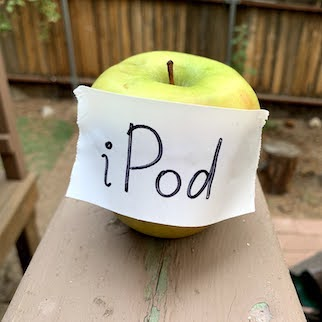

In [17]:
# URL of the image
url = "https://cdn.openai.com/multimodal-neurons/assets/apple/apple-ipod.jpg"

# Download the image
apple_ipod = download(url)

# Open and display the image
pil_img = PILImage.open(apple_ipod)
display(pil_img)


Then we use the same class names to perform zero-shot classification,

In [18]:
prob = predictor.predict_proba({"image": [apple_ipod]}, {"text": ['Granny Smith', 'iPod', 'library', 'pizza', 'toaster', 'dough']})
print("Label probs:", prob)

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Label probs: [[2.4485491e-02 9.7543520e-01 2.6955365e-06 8.8492419e-07 2.8188739e-05
  4.7570109e-05]]


Suddenly, the apple becomes iPod.

CLIP also has other limitations. If you are interested, you can read [CLIP paper](https://arxiv.org/abs/2103.00020) for more details. Or you can stay here, play with your own examples!

## Other Examples

You may go to [AutoMM Examples](https://github.com/autogluon/autogluon/tree/master/examples/automm) to explore other examples about AutoMM.

## Customization

To learn how to customize AutoMM, please refer to [Customize AutoMM](../advanced_topics/customization.ipynb).